In [ ]:
### Tasa de muestreo 0.8

In [6]:
import matplotlib.pyplot as plt
from Function import *
import matplotlib
from skimage.metrics import structural_similarity as ssim
import cv2
import numpy as np
from tqdm import tqdm
import hdf5storage

from main_fast_marching_approach import fastMarching_approach

In [23]:
np.save('data/viking_512.npy',data)

(128, 128, 512)

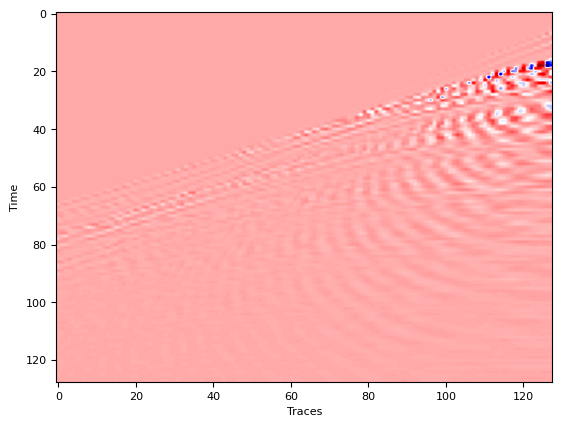

In [25]:
#Avo Mobil viking
data_path = 'data/viking_512.npy'
data = np.load(data_path)[:,:,:512]
index = 14 
plt.imshow(data[:,:,index],aspect='auto',cmap='seismic')
plt.xlabel("Traces")
plt.ylabel("Time")
data.shape

In [26]:
traces = [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.]
H_ = np.array(list(map(bool,traces)))
print(H_)
H_.shape

[ True  True  True  True  True  True  True  True False False  True  True
  True  True False False  True  True  True  True  True  True  True  True
  True  True  True  True False False  True False  True  True  True  True
  True False  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
 False  True  True  True  True  True  True  True  True  True  True False
 False  True  True  True False  True  True False  True  True  True  True
  True  True False  True  True False  True  True  True  True  True  True
 False  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True False  True  True False  True  True
  True  True False  True  True  True False False False  True False  True
 False False  True  True False  True  True  True  True  True  True False
  True False  True  True  True  True  True False  T

(512,)

100%|█████████████████████████████████████████| 126/126 [00:03<00:00, 32.58it/s]


46.61317869454688


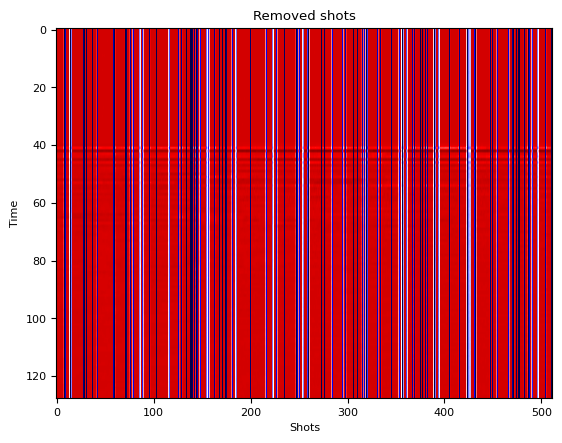

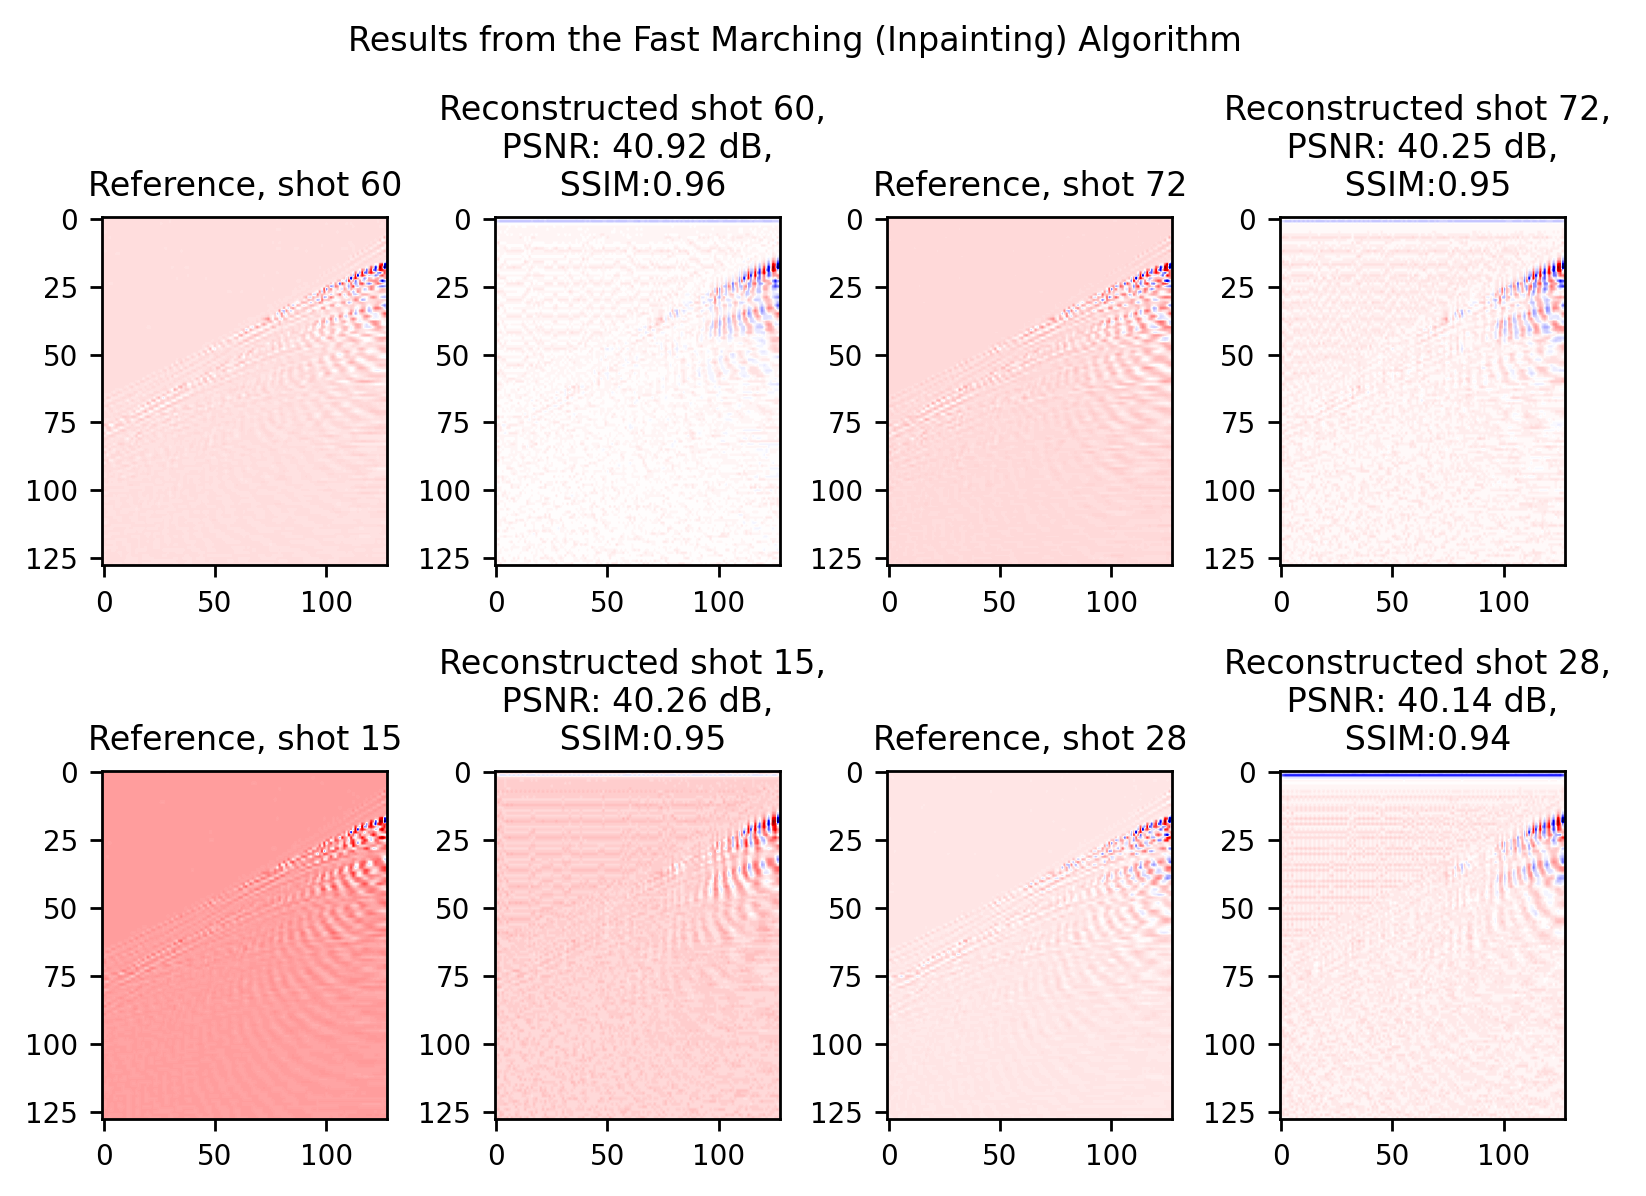

Time: 9.692164659500122
[  8   9  14  15  28  29  31  37  42  59  60  71  72  76  79  86  89  96
 103 116 126 129 134 138 139 140 142 144 145 148 155 157 163 168 171 174
 175 181 185 200 216 223 227 235 247 248 250 254 259 260 273 276 284 295
 298 306 310 315 317 319 320 331 334 345 353 356 357 361 367 369 375 377
 380 382 389 390 394 405 415 423 424 426 431 432 447 449 454 466 470 471
 474 476 477 482 486 487 490 496 504 510]
PSNR:
Min Result: 35.925580249614534
Mean Result: 38.147819810823705
STD Result: 1.0547724287761737
Max Result: 40.91754684034042
SSIM:
Min Result: 0.9127460829482993
Mean Result: 0.9315262975044876
STD Result: 0.010912484145336307
Max Result: 0.9572376131259585


In [27]:
fastMarching_approach(data_path, data_format='numpy', exp_number=1, H=H_)

In [12]:
#Seam Phase II
data_path = 'data/spii_180s.npy'

In [13]:
# data = np.load(data_path)
# np.save('data/spii_180s.npy',data[:,:,:180])

(128, 128, 180)

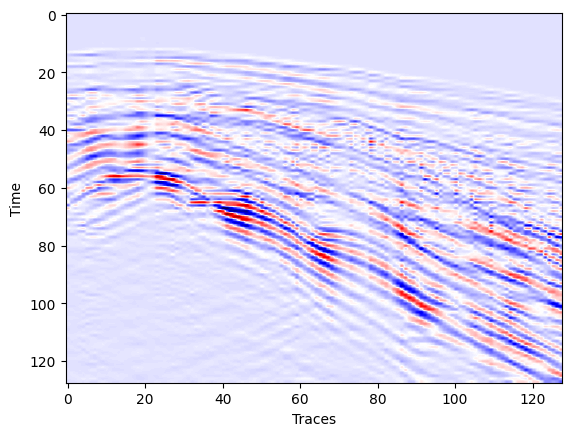

In [14]:
x = np.load(data_path)
data = np.ndarray((128,128,x.shape[2]))
for i in range(x.shape[2]):
  data[:,:,i] = cv2.resize(x[:,:,i].astype('float32'), (128, 128), interpolation = cv2.INTER_AREA)

index = 14
plt.imshow(data[:,:,index],aspect='auto',cmap='seismic')
plt.xlabel("Traces")
plt.ylabel("Time")
data.shape

In [15]:
traces = [2,20,23,36,40,45,49,56,62,64,67,71,73,78,83,89,91,93,98,103,107,110,113,115,117,127,131,134,138,142,150,151,156,167,171,175]
H_ = matriz_H(index=traces,size=180)
print(H_)
H_.shape

[ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True False  True  True  True  True False  True  True
  True False  True  True  True  True  True  True False  True  True  True
  True  True False  True False  True  True False  True  True  True False
  True False  True  True  True  True False  True  True  True  True False
  True  True  True  True  True False  True False  True False  True  True
  True  True False  True  True  True  True False  True  True  True False
  True  True False  True  True False  True False  True False  True  True
  True  True  True  True  True  True  True False  True  True  True False
  True  True False  True  True  True False  True  True  True False  True
  True  True  True  True  True  True False False  True  True  True  True
 False  True  True  True  True  True  True  True  T

(180,)

100%|████████████████████████████████████████| 126/126 [00:00<00:00, 131.70it/s]


40.399501207664905


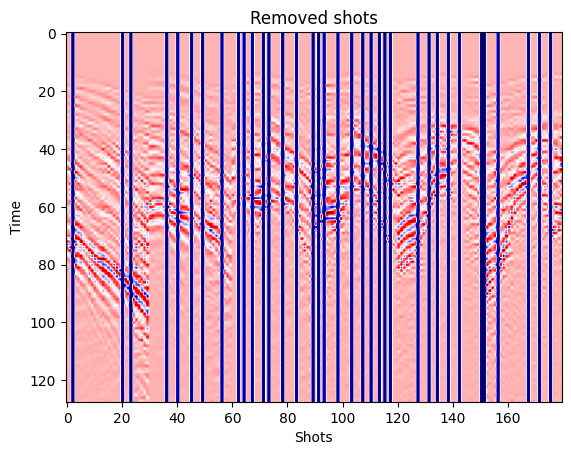

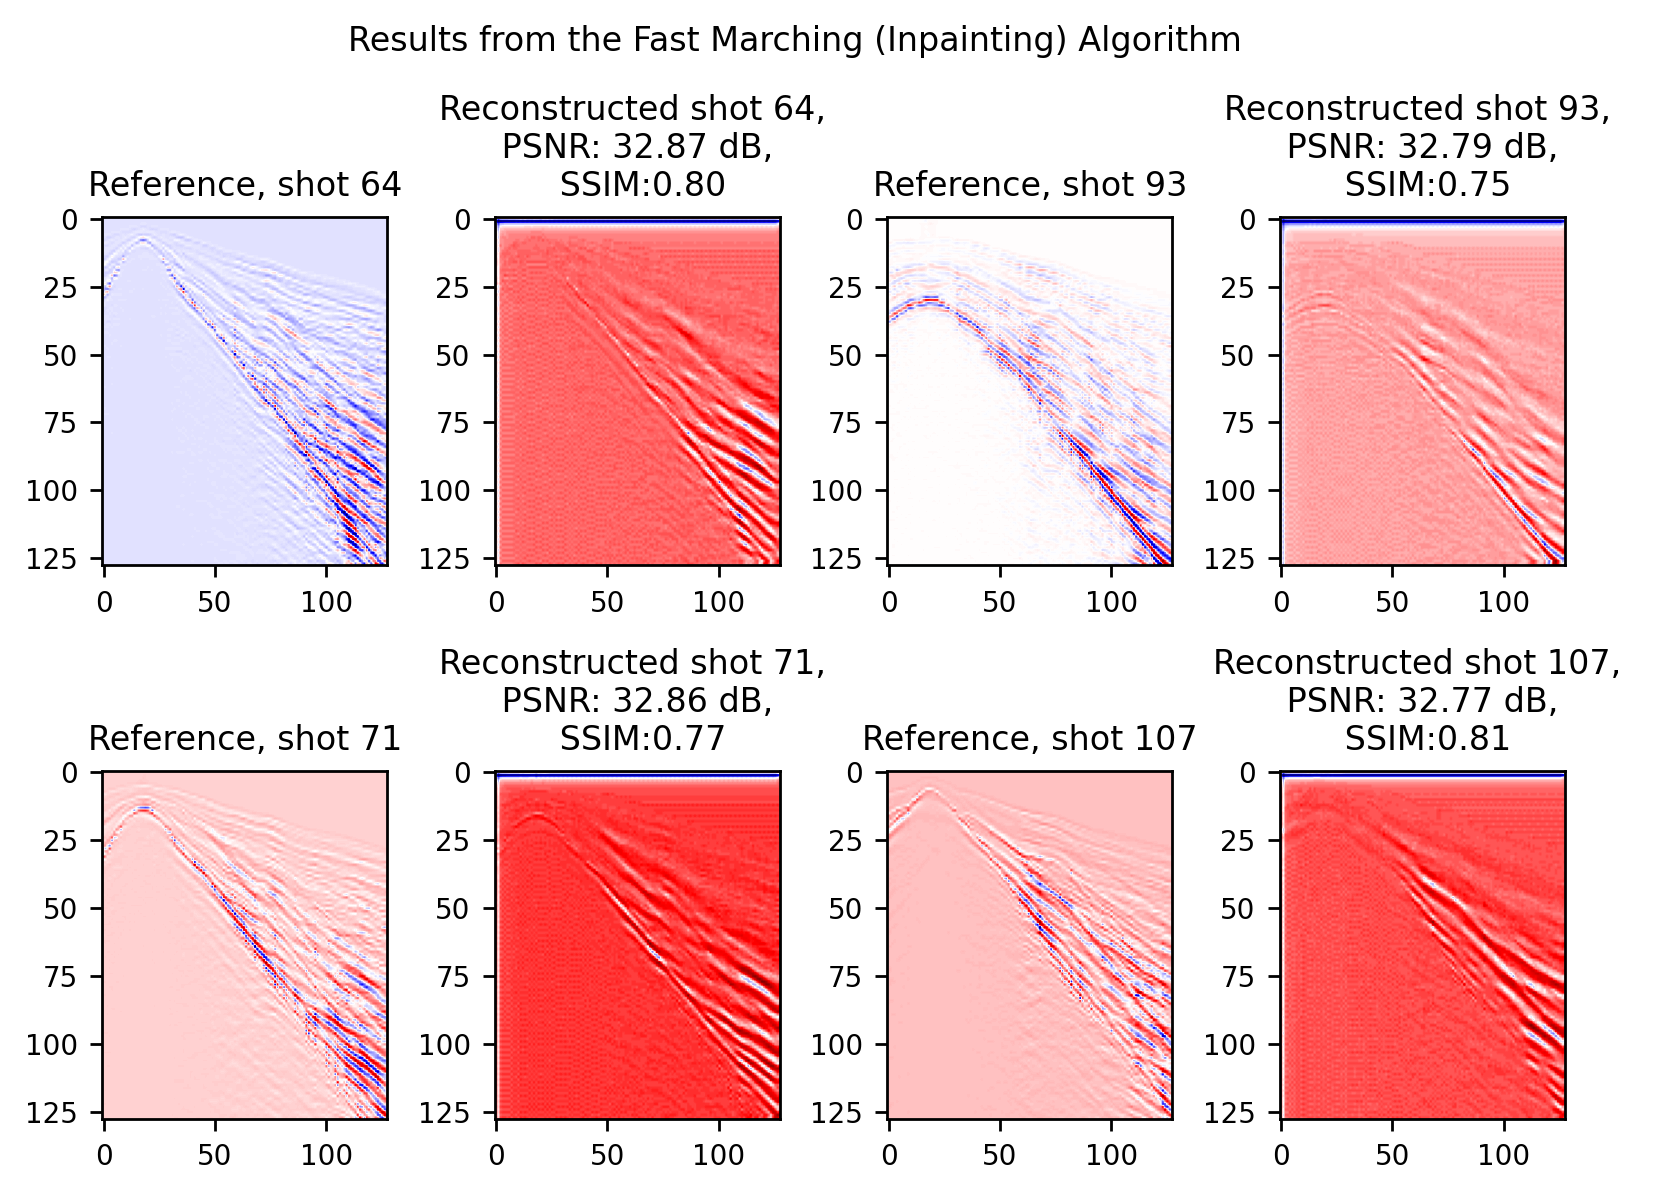

Time: 3.5848960876464844
[  2  20  23  36  40  45  49  56  62  64  67  71  73  78  83  89  91  93
  98 103 107 110 113 115 117 127 131 134 138 142 150 151 156 167 171 175]
PSNR:
Min Result: 30.289812429473635
Mean Result: 31.814719259785324
STD Result: 0.7587299881296715
Max Result: 32.87068907203708
SSIM:
Min Result: 0.5272121881527058
Mean Result: 0.7221150265265099
STD Result: 0.07627593661071018
Max Result: 0.8190100623661029


In [16]:
fastMarching_approach(data_path, data_format='numpy', exp_number=1, H=H_)

In [6]:
#Seam Phase II
data_path = 'data/gas_lens_devito_70s.npy'

In [7]:
# data = np.load(data_path)
# np.save('data/gas_lens_devito_70s.npy',data[:,:,:70])

(128, 128, 70)

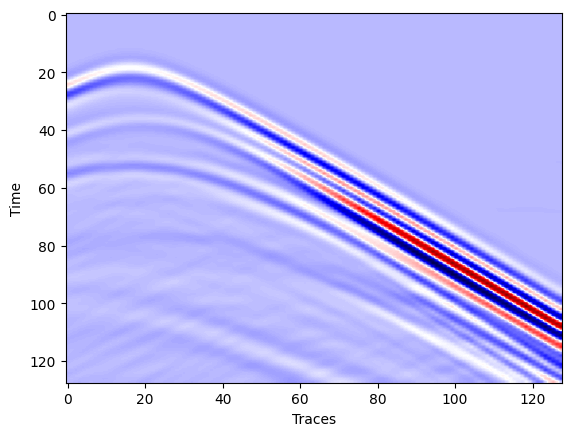

In [8]:
x = np.load(data_path)
data = np.ndarray((128,128,x.shape[2]))
for i in range(x.shape[2]):
  data[:,:,i] = cv2.resize(x[:,:,i].astype('float32'), (128, 128), interpolation = cv2.INTER_AREA)

index = 14
plt.imshow(data[:,:,index],aspect='auto',cmap='seismic')
plt.xlabel("Traces")
plt.ylabel("Time")
data.shape

In [96]:
traces = [0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69]
H_ = matriz_H(index=traces,size=70)
print(H_)
H_.shape

[False  True  True False  True  True False  True  True False  True  True
 False  True  True False  True  True False  True  True False  True  True
 False  True  True False  True  True False  True  True False  True  True
 False  True  True False  True  True False  True  True False  True  True
 False  True  True False  True  True False  True  True False  True  True
 False  True  True False  True  True False  True  True False]


(70,)

100%|████████████████████████████████████████| 126/126 [00:00<00:00, 446.46it/s]


38.10483765361971


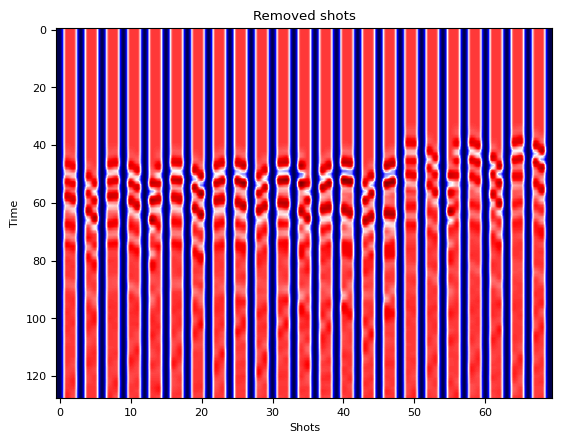

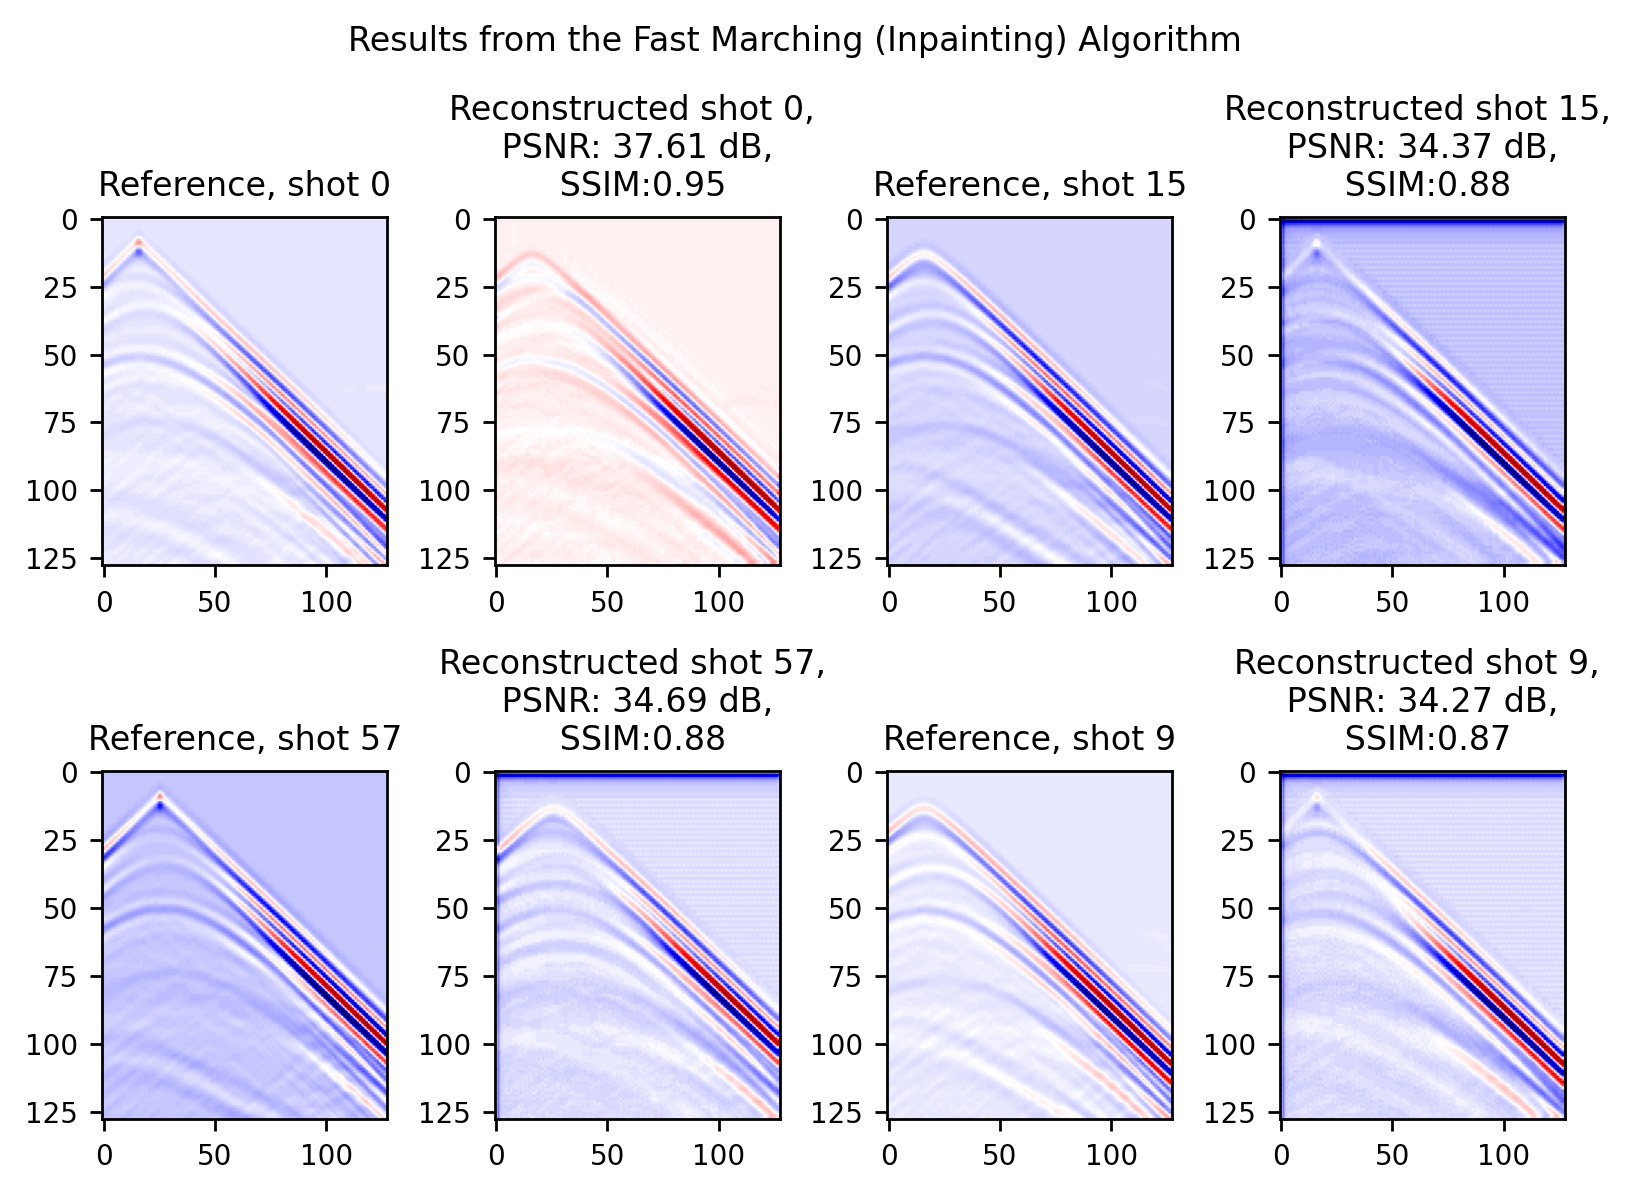

Time: 2.1483638286590576
[ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69]
PSNR:
Min Result: 32.052973013343255
Mean Result: 33.30360606540385
STD Result: 1.1759031980456285
Max Result: 37.613877232674426
SSIM:
Min Result: 0.5856945146935173
Mean Result: 0.76522686793627
STD Result: 0.09386353600610912
Max Result: 0.9493080117178547


In [97]:
fastMarching_approach(data_path, data_format='numpy', exp_number=1, H=H_)